In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=427c4e1db662f42ca104ae6c138ef276e0ed37ebdb701c1ea87ba44cc7909e79
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [1]:
from operator import itemgetter
import networkx as nx
#import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Blockchain

In [ ]:
#https://pt.wikipedia.org/wiki/Blockchain

SEED = "Blockchain".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Issn (Identifier)",
         "S2Cid (Identifier)",
         "Bibcode (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Blockchain
1 2018 Bitcoin Bomb Threats
1 2020 Twitter Account Hijacking
1 50 Things That Made The Modern Economy
1 Acid
Could not load Acid
1 Ascap


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Ascap
1 Abra (Company)
1 Accenture
Could not load Accenture
1 Access Control
1 Ad Hoc
Could not load Ad Hoc
1 Adam Back
1 Airdrop (Cryptocurrency)
1 Alex Tapscott
1 Algorand
Could not load Algorand
1 Alternative Dns Root
1 Ambacoin
1 American Institute Of Certified Public Accountants
1 Andreas Antonopoulos
1 Application Layer
1 Armstrong'S Axioms
1 Ars Technica
1 Asia Times
1 Augur (Software)
1 Auroracoin
Could not load Auroracoin
1 Authentication
1 Automation
Could not load Automation
1 Avalanche (Blockchain Platform)
1 Aventus Protocol
1 Axie Infinity
Could not load Axie Infinity
1 Bbc World Service
1 Btc-E
1 Btcc (Company)
Could not load Btcc (Company)
1 Bux (Brokerage)
1 Back Office
1 Bank
1 Bank For International Settlements
1 Banking
Could not load Banking
1 Bankruptcy Of Ftx
1 Battery Cell
1 Berenberg Bank
1 Best-Effort Delivery
1 Bill Gates
Could not load Bill Gates
1 Binance
Could not load Binance
1 Bitflyer
1 Bitgo
1 Bitlicense
1 Bitmex
1 Bitcoin
1 Bitcoin Atm


In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

48801 nodes, 99958 edges


In [ ]:
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Blockchain', 'Blockchains'), ('Cryptocurrency Exchange', 'Cryptocurrency Exchanges'), ('Database', 'Databases'), ('Database Transaction', 'Database Transactions'), ('Digital Signature', 'Digital Signatures'), ('Early Adopter', 'Early Adopters'), ('Graph Database', 'Graph Databases'), ('Hash Function', 'Hash Functions'), ('Initial Coin Offering', 'Initial Coin Offerings'), ('Merkle Tree', 'Merkle Trees'), ('Relational Database', 'Relational Databases'), ('Smart Contract', 'Smart Contracts'), ('Stablecoin', 'Stablecoins'), ('Stored Procedure', 'Stored Procedures'), ('Timestamp', 'Timestamps'), ('United States Dollar', 'United States Dollars'), ('Algorithm', 'Algorithms'), ('Banknote', 'Banknotes'), ('Credit Card', 'Credit Cards'), ('Punched Card', 'Punched Cards'), ('Reputation System', 'Reputation Systems'), ('Spreadsheet', 'Spreadsheets'), ('Tally Stick', 'Tally Sticks'), ('Video Game', 'Video Games'), ('Access Control List', 'Access Control Lists'), ('Credential', 'Credentials'), (

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

48425 nodes, 99008 edges


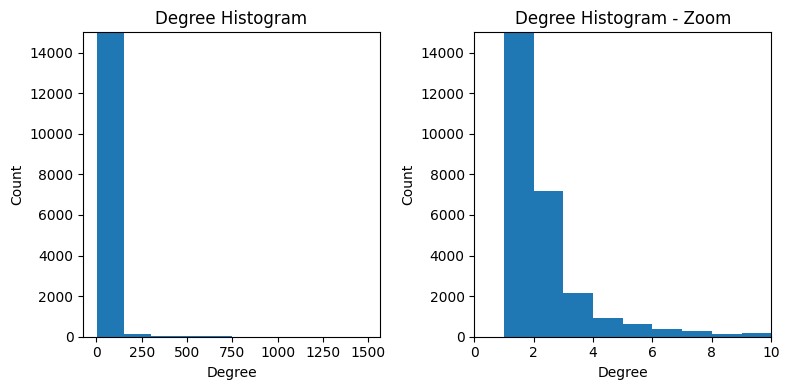

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna_blockchain.graphml")

12598 nodes, 63181 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(gsub)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(gsub)/nx.number_of_edges(g))))
print("Edges per nodes: {:.2f}".format(nx.number_of_edges(gsub)/len(gsub)))

Nodes removed: 73.98%
Edges removed: 36.19%
Edges per nodes: 5.02


In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree))) # Issn (Identifier), S2Cid (Identifier),

180 Blockchain
171 Bitcoin
168 Cryptocurrency
151 Proof-Of-Work
146 Sha-2
143 Bitcoin Cash
142 Bitcoin Gold
142 Lightning Network
142 Cryptocurrency Wallet
142 Cryptocurrency Bubble
126 Ethereum
123 Cryptographic Hash Function
121 Digital Currency
119 Non-Fungible Token
117 Proof-Of-Stake
116 Cryptocurrency Exchange
116 Consensus (Computer Science)
116 Coinbase
116 Wayback Machine
115 Smart Contract
115 Virtual Currency
114 Distributed Ledger
114 Mt. Gox
113 Lbry
113 Fork (Blockchain)
113 Blockchain Game
113 Crypto-Anarchism
113 Binance
112 Complementary Currency
112 Decentralized Autonomous Organization
112 Gemini (Company)
112 Brave (Web Browser)
112 Dogecoin
112 Initial Coin Offering
112 Token Money
111 Diem (Digital Currency)
111 Nxt
111 The Dao (Organization)
111 Etoro
111 Environmental Impact Of Cryptocurrencies
111 Web3
111 Litecoin
111 Tezos
111 Ripple (Payment Protocol)
111 Double-Spending
111 Petro (Cryptocurrency)
111 Digital Currency Group
111 Auroracoin
111 Bitconnect
111 

# Machine Learning

In [ ]:
#https://en.wikipedia.org/wiki/Machine_learning

SEED = "Machinelearning".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Issn (Identifier)",
         "S2Cid (Identifier)",
         "Bibcode (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Machinelearning
1 Aaai Conference On Artificial Intelligence
1 Acm Computing Classification System
1 Acm Computing Surveys
1 Adaline


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Adaline
1 Ai Boom
Could not load Ai Boom
1 Ai Control Problem
1 Ai Safety
1 Ai Takeover
1 Ai Winter
1 At&T Labs
1 Action Selection
1 Activation Function
1 Active Learning (Machine Learning)
1 Adaptive Website
1 Adversarial Machine Learning
1 Affective Computing
1 Agriculture
1 Alan Mackworth
1 Alan Turing
Could not load Alan Turing
1 Alexnet
Could not load Alexnet
1 Alex Graves (Computer Scientist)
1 Algorithm
1 Algorithm Design
1 Algorithmic Bias
1 Algorithmic Efficiency
1 Algorithmic Transparency
1 Alphafold
1 Alphago
Could not load Alphago
1 Alphazero
1 Amazon Machine Learning
1 Analysis Of Algorithms
1 Andrew Ng
Could not load Andrew Ng
1 Angoss
1 Anomaly Detection
1 Anthropic
1 Apache Mahout
1 Apache Spark
1 Apache Systemml
1 Application Security
1 Applications Of Artificial Intelligence
1 Apprenticeship Learning
1 Approximate Computing
1 Array Data Structure
1 Arthur Samuel (Computer Scientist)
1 Artificial Intelligence: A Modern Approach
1 Artificial General Intel

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

63946 nodes, 194123 edges


In [ ]:
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
    node1, node2 = dup
    if node1 in g and node2 in g:
        g = nx.contracted_nodes(g, node1, node2, self_loops=False)


# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Algorithm', 'Algorithms'), ('Artificial Immune System', 'Artificial Immune Systems'), ('Artificial Neural Network', 'Artificial Neural Networks'), ('Artificial Neuron', 'Artificial Neurons'), ('Autoencoder', 'Autoencoders'), ('Autonomous Car', 'Autonomous Cars'), ('Basis Function', 'Basis Functions'), ('Bayesian Network', 'Bayesian Networks'), ('Brain–Computer Interface', 'Brain–Computer Interfaces'), ('Chatbot', 'Chatbots'), ('Computer Science', 'Computer Sciences'), ('Convolution', 'Convolutions'), ('Convolutional Neural Network', 'Convolutional Neural Networks'), ('Dna Sequence', 'Dna Sequences'), ('Database', 'Databases'), ('Decision Support System', 'Decision Support Systems'), ('Decision Tree', 'Decision Trees'), ('Deep Neural Network', 'Deep Neural Networks'), ('Deepfake', 'Deepfakes'), ('Differentiable Function', 'Differentiable Functions'), ('Diffusion Model', 'Diffusion Models'), ('Embedded System', 'Embedded Systems'), ('Evolutionary Algorithm', 'Evolutionary Algorithms')

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

63082 nodes, 191820 edges


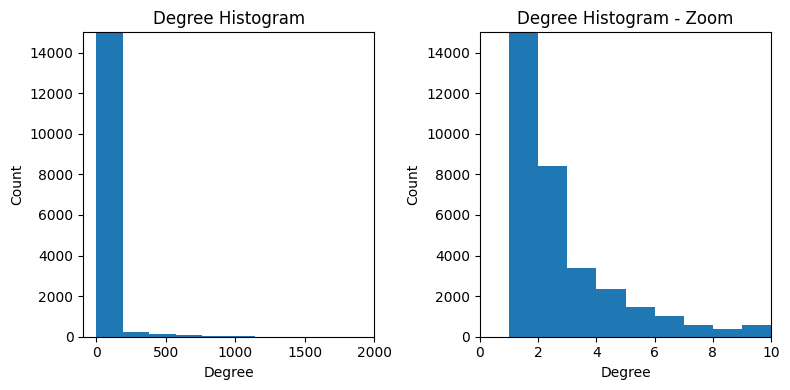

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna_ml.graphml")

20984 nodes, 149722 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(gsub)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(gsub)/nx.number_of_edges(g))))
print("Edges per nodes: {:.2f}".format(nx.number_of_edges(gsub)/len(gsub)))

Nodes removed: 66.74%
Edges removed: 21.95%
Edges per nodes: 7.14


In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree))) # Issn (Identifier), S2Cid (Identifier)

434 Machine-Learning
316 Artificial Intelligence
261 Deep-Learning
253 Data-Mining
251 Artificial Neural Network
232 Cluster Analysis
231 Regression Analysis
226 Reinforcement Learning
218 Supervised Learning
218 Wayback Machine
213 Unsupervised Learning
209 Pmc (Identifier)
206 Convolutional Neural Network
201 Citeseerx (Identifier)
201 Recurrent Neural Network
199 Transformer (Machine Learning Model)
197 Generative Adversarial Network
194 Long Short-Term Memory
191 Autoencoder
188 Q-Learning
187 Gated Recurrent Unit
187 Statistic
187 Computational Learning Theory
186 Echo State Network
185 State–Action–Reward–State–Action
184 Natural-Language Processing
182 Algorithm
182 Computer Vision
179 Glossary Of Artificial Intelligence
175 Oclc (Identifier)
171 Bayesian Network
171 Computer Science
169 Statistical Classification
162 Speech Recognition
161 Principal Component Analysis
154 Logistic Regression
152 Support-Vector Machine
151 Pattern Recognition
151 Linear Regression
150 Linear Dis

# DevOps

In [ ]:
#https://pt.wikipedia.org/wiki/Blockchain

SEED = "Dev Ops".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Issn (Identifier)",
         "S2Cid (Identifier)",
         "Bibcode (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Dev Ops
1 Agile Software Development
1 Andon (Manufacturing)
1 Aspect-Oriented Programming
1 Belgium
1 Black-Box Testing
1 Ci/Cd
Could not load Ci/Cd
1 Capability Maturity Model Integration
1 Code Review
1 Computer Engineering
1 Computer Programming
1 Computer Science
1 Continuous Delivery
Could not load Continuous Delivery
1 Continuous Improvement Process
1 Continuous Integration
1 Cross-Site Scripting
1 Dataops
1 Data Model
1 Data Modeling
1 Devops Toolchain
1 Dynamic Application Security Testing
1 Enterprise Unified Process
1 Enterprise Architecture
1 Entity–Relationship Model
1 Essential Systems Analysis
1 Executable Uml
1 Extreme Programming
1 Formal Methods
1 Function Model
1 Functional Specification
1 Ghent
1 Git


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Git
1 Github
Could not load Github
1 Google
Could not load Google
1 Idef
1 Iso/Iec 15504
1 Itil
Could not load Itil
1 It Operations
Could not load It Operations
1 Incremental Build Model
1 Information Model
1 Information Science
1 Information Technology Operations
1 Infrastructure As Code
1 Iterative And Incremental Development
1 Kaizen
1 Lean Manufacturing
Could not load Lean Manufacturing
1 Lean Software Development
1 Lean Thinking
1 Metamodeling
1 Microservices
Could not load Microservices
1 Model-Driven Engineering
1 Modeling Language
1 Nicole Forsgren
1 O'Reilly Media
1 Os-Level Virtualization
1 Osti (Identifier)
1 Owasp
Could not load Owasp
1 Object-Oriented Programming
1 Object Model
1 Ontology (Computer Science)
1 Pdca
Could not load Pdca
1 Programming Paradigm
1 Project Management
1 Puppet (Software)
1 Rapid Application Development
1 Red Hat
Could not load Red Hat
1 Requirements Engineering
1 Risk Management
1 Round-Trip Engineering
1 Sql Injection
1 Ssrn (Ident

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

9045 nodes, 22993 edges


In [ ]:
original = g.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Information Science', 'Information Sciences'), ('Modeling Language', 'Modeling Languages'), ('Software Developer', 'Software Developers'), ('Compiler', 'Compilers'), ('Customer', 'Customers'), ('Deliverable', 'Deliverables'), ('Project Stakeholder', 'Project Stakeholders'), ('Software Bug', 'Software Bugs'), ('Use Case', 'Use Cases'), ('Mixin', 'Mixins'), ('Acceptance Test', 'Acceptance Tests'), ('Control System', 'Control Systems'), ('Unit Test', 'Unit Tests'), ('Computer Program', 'Computer Programs'), ('Embedded System', 'Embedded Systems'), ('Operating System', 'Operating Systems'), ('Personal Computer', 'Personal Computers'), ('Algorithm', 'Algorithms'), ('Geographic Information System', 'Geographic Information Systems'), ('Information System', 'Information Systems'), ('Non-Functional Requirement', 'Non-Functional Requirements'), ('Punched Card', 'Punched Cards'), ('Randomized Algorithm', 'Randomized Algorithms'), ('Specification', 'Specifications'), ('Video Game', 'Video Games

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

8957 nodes, 22799 edges


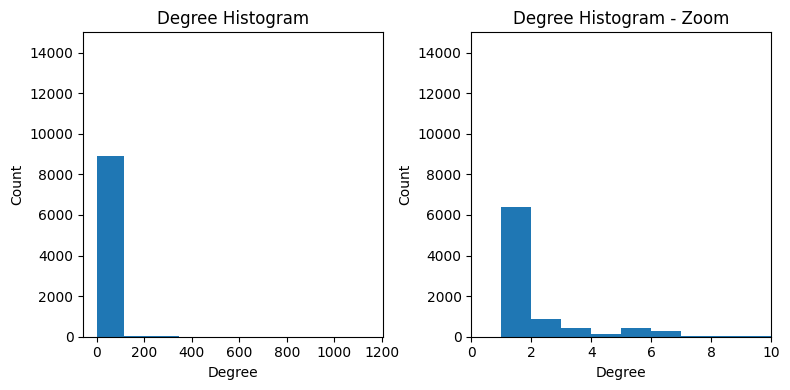

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna_devops.graphml")

2557 nodes, 16399 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(gsub)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(gsub)/nx.number_of_edges(g))))
print("Edges per nodes: {:.2f}".format(nx.number_of_edges(gsub)/len(gsub)))

Nodes removed: 71.45%
Edges removed: 28.07%
Edges per nodes: 6.41


In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree))) # Issn (Identifier), S2Cid (Identifier),

69 Software Engineering
63 Software Testing
63 Agile Software Development
63 Devops
63 Software Configuration Management
62 Software Maintenance
62 Software Development Process
61 Data Modeling
61 Software Design
61 Waterfall Model
60 Computer Engineering
60 Systems Modeling Language
60 Software Quality Assurance
60 Software Prototyping
60 Spiral Model
60 Idef
60 Software Deployment
60 Systems Engineering
59 Extreme Programming
59 Iterative And Incremental Development
59 Computer Science
59 Software Quality
59 Scrum (Software Development)
59 Unified Modeling Language
59 V-Model (Software Development)
59 Rapid Application Development
59 Unified Process
59 Project Management
59 Software
59 Capability Maturity Model Integration
59 Incremental Build Model
58 Risk Management
58 Executable Uml
58 Systems Analysis
58 Systems Modeling
58 Requirements Engineering
58 Systems Development Life Cycle
58 Function Model
58 Functional Specification
58 Object-Oriented Programming
57 Computer Programmin

# Computer security

In [ ]:
#https://pt.wikipedia.org/wiki/Blockchain

SEED = "Computer Security".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Issn (Identifier)",
         "S2Cid (Identifier)",
         "Bibcode (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Computer Security
1 2600: The Hacker Quarterly
1 Acm Computing Classification System
1 Arpanet
Could not load Arpanet
1 At&T
Could not load At&T
1 Accelerometers
1 Access-Control List
1 Access Control
1 Access Control List
1 Activity Tracker
1 Adam Back
1 Address Resolution Protocol
1 Advanced Encryption Standard
1 Advanced Driver-Assistance Systems
1 Advanced Persistent Threat
1 Adware
1 Agency Of The European Union
1 Air Navigation Service Provider
1 Air Traffic Control
1 Airbag
1 Airbus A380
1 Aircraft Communications Addressing And Reporting System
1 Algorithm
1 Algorithm Design
1 Algorithmic Efficiency
1 Algorithms
1 Analysis Of Algorithms
1 Annie Anton
1 Anomaly Detection
1 Anonymous (Group)
1 Anti-Keylogger
1 Anti-Lock Brakes
1 Anti-Malware
1 Anti-Spyware
1 Anti-Subversion Software
1 Anti-Tamper Software
1 Anti-Theft
1 Anti-Virus Software
1 Antivirus Software
Could not load Antivirus Software
1 António Guterres
1 Apache Hadoop
1 Apparmor
1 Apple Inc.
Could not load Apple Inc.
1

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

90421 nodes, 212560 edges


In [ ]:
g = original.copy()

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
    node1, node2 = dup
    if node1 in g and node2 in g:
        g = nx.contracted_nodes(g, node1, node2, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Access Control List', 'Access Control Lists'), ('Algorithm', 'Algorithms'), ('Bank Account', 'Bank Accounts'), ('Biometric', 'Biometrics'), ('Bitcoin', 'Bitcoins'), ('Botnet', 'Botnets'), ('Business Insider', 'Business Insiders'), ('Code Review', 'Code Reviews'), ('Computer Network', 'Computer Networks'), ('Computer Science', 'Computer Sciences'), ('Computer System', 'Computer Systems'), ('Computer Worm', 'Computer Worms'), ('Credit Card', 'Credit Cards'), ('Credit Card Number', 'Credit Card Numbers'), ('Cryptographic Protocol', 'Cryptographic Protocols'), ('Cybercrime', 'Cybercrimes'), ('Database', 'Databases'), ('Debit Card', 'Debit Cards'), ('Decision Support System', 'Decision Support Systems'), ('Device Driver', 'Device Drivers'), ('Digital Certificate', 'Digital Certificates'), ('Embedded System', 'Embedded Systems'), ('Formal Language', 'Formal Languages'), ('Geographic Information System', 'Geographic Information Systems'), ('Graphics Processing Unit', 'Graphics Processing U

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

89493 nodes, 208960 edges


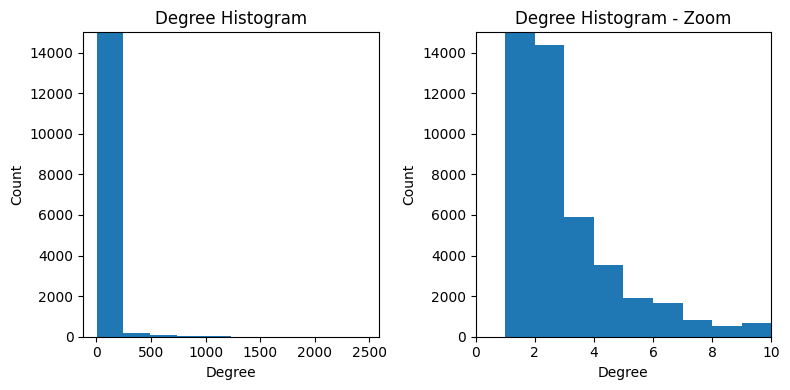

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna_computer_sec.graphml")

31483 nodes, 150950 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - len(gsub)/len(g))))
print("Edges removed: {:.2f}%".format(100*(1 - nx.number_of_edges(gsub)/nx.number_of_edges(g))))
print("Edges per nodes: {:.2f}".format(nx.number_of_edges(gsub)/len(gsub)))

Nodes removed: 64.82%
Edges removed: 27.76%
Edges per nodes: 4.79


In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree))) # Issn (Identifier), S2Cid (Identifier),

294 Wayback Machine
290 Computer Security
218 Information Security
199 Network Security
188 Application Security
185 Operating System
182 Cyberwarfare
182 Computer Network
180 Intrusion-Detection System
174 Malware
147 Vulnerability (Computing)
143 Encryption
141 Computer Worm
140 Ransomware
140 Computer Virus
138 Cryptography
136 Exploit (Computer Security)
136 Authentication
136 Computer Science
134 Spyware
134 Oclc (Identifier)
133 Internet
132 Trojan Horse (Computing)
131 Social Engineering (Security)
128 Backdoor (Computing)
127 Algorithm
126 Botnet
126 Phishing
126 Firewall (Computing)
125 Hacktivism
122 Rootkit
121 Artificial Intelligence
120 Computer Hardware
120 Software Bug
117 Payload (Computing)
116 United States
116 Open-Source Software
115 Security Hacker
115 Crimeware
115 Database
114 Digital Rights Management
114 Internet Security
113 Eavesdropping
113 Microsoft
113 Citeseerx (Identifier)
113 Host-Based Intrusion Detection System
113 Arbitrary Code Execution
113 Web She

# Merging networks

## Downloading Saved graphs files

ML - Graph

In [2]:
!gdown https://drive.google.com/uc?id=1Y1IqhbQkKUTx2tMLgEXPc83SnndgY36-

Downloading...
From: https://drive.google.com/uc?id=1Y1IqhbQkKUTx2tMLgEXPc83SnndgY36-
To: /content/cna_ml.graphml
100% 16.2M/16.2M [00:00<00:00, 83.6MB/s]


DevOps - Graph

In [3]:
!gdown https://drive.google.com/uc?id=15LCiv37PXEe14f2GLOPAioZm8UUtOEv2

Downloading...
From: https://drive.google.com/uc?id=15LCiv37PXEe14f2GLOPAioZm8UUtOEv2
To: /content/cna_devops.graphml
100% 1.80M/1.80M [00:00<00:00, 147MB/s]


ComputerSec - Graph

In [4]:
!gdown https://drive.google.com/uc?id=1UZnABdhmQjlQb8Q9njH0jMGxj4uuQpv3

Downloading...
From: https://drive.google.com/uc?id=1UZnABdhmQjlQb8Q9njH0jMGxj4uuQpv3
To: /content/cna_computer_sec.graphml
100% 16.9M/16.9M [00:00<00:00, 58.7MB/s]


BlockChain - Graph

In [5]:
!gdown https://drive.google.com/uc?id=1_2XoZVPYf6Ag_P0Cdi7xlIHQ_5uwQF4n

Downloading...
From: https://drive.google.com/uc?id=1_2XoZVPYf6Ag_P0Cdi7xlIHQ_5uwQF4n
To: /content/cna_blockchain.graphml
100% 6.83M/6.83M [00:00<00:00, 48.9MB/s]


## Merging

In [28]:
# Load graphs from GraphML files
graph_BC = nx.read_graphml("/content/cna_blockchain.graphml")
graph_CS = nx.read_graphml("/content/cna_computer_sec.graphml")
graph_DO = nx.read_graphml("/content/cna_devops.graphml")
graph_ML = nx.read_graphml("/content/cna_ml.graphml")

# Merge graphs while preserving common nodes
merged_graph = nx.compose_all([graph_BC, graph_CS, graph_DO, graph_ML])

In [29]:
# Print nodes and edges of the merged graph
print("Merged Nodes:", merged_graph.nodes())
print("Merged Edges:", merged_graph.edges())

Merged Nodes: ['Doctor Who', 'War In Afghanistan (2001–2021)', 'Construction And Management Simulation', 'Xml Metadata Interchange', 'Powertrain', 'Language Integrated Query', 'Bern', 'Peer-To-Peer', 'Internet Explorer', 'Upbit', 'European Economic Area', 'Almon Brown Strowger', 'Bank Of Lithuania', 'Iso/Iec 11404', 'History Of The United States (2008–Present)', 'Robinhood (Company)', 'Bitbake', 'Gmr (Cryptography)', 'James Harris Simons', 'Software Application', 'Debt Bondage', 'Video Game Clone', 'Technology Roadmap', 'John Ashcroft', 'Compiler Construction', 'Crisis In Venezuela', 'Smartphone', 'Secure Shell', 'Shenzhen', 'Universities Research Association', 'William Randolph Hearst', 'Austin, Texas', 'Rational Number', 'Winemaking', 'Publish–Subscribe Pattern', 'Database Administrator', 'Environmental Effects Of Aviation', 'Economic Theory', 'Bahamas', 'John L. Hennessy', 'Jean-Jacques Rousseau', 'Tandem Computers', 'Cold War', 'Tobias Adrian', 'Air Rights', 'Agricultural Economics

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
# Assuming you have node attributes like 'label' in each graph
common_nodes = set(graph_BC.nodes()) & set(graph_CS.nodes()) & set(graph_DO.nodes()) & set(graph_ML.nodes())

# Extract the common subgraph
common_subgraph = merged_graph.subgraph(common_nodes)

# Print nodes and edges of the common subgraph
print("Common Nodes:", common_subgraph.nodes())
print("Common Edges:", common_subgraph.edges())

Common Nodes: ['Martin Fowler (Software Engineer)', 'Electronic Design Automation', 'State (Computer Science)', 'Multithreading (Computer Architecture)', 'Semantic Web', 'Algorithmic Efficiency', 'Resource Description Framework', 'Integrated Circuit', 'Javascript', 'Software Bug', 'Algorithm', 'Software Construction', 'Swift (Programming Language)', 'Erlang (Programming Language)', 'Electrical Engineering', 'Function (Mathematics)', 'Cobol', 'Wiper (Malware)', 'Engineering', 'Magnetic Ink Character Recognition', 'Distributed Artificial Intelligence', 'X3D', 'Client–Server Model', 'Programming Language Theory', 'Computational Complexity Theory', 'Vcloud Air', 'Formal Language', 'Acm Computing Classification System', 'Austria', 'Photograph Manipulation', 'Query Language', 'Software Release Life Cycle', 'Node.Js', 'American National Standards Institute', 'Prosthesis', 'Iso/Iec 12207', 'Computational Biology', 'Type Theory', 'Php', 'Software Deployment', 'Security Engineering', 'C (Program

In [31]:
# Print total number of nodes in the common subgraph
print("Total Nodes First Common graph:", merged_graph.number_of_nodes())
# Print total number of nodes in the common subgraph
print("Total Nodes in Common Subgraph:", common_subgraph.number_of_nodes())

Total Nodes First Common graph: 46507
Total Nodes in Common Subgraph: 826


In [ ]:
nx.write_graphml(common_subgraph, "merged_network.graphml")

## Adding new metrics to the graph

In [32]:
# Adicione as métricas ao grafo
#nx.set_node_attributes(common_subgraph, nx.core_number(common_subgraph), 'k_core')
#nx.set_node_attributes(common_subgraph, nx.k_shell(common_subgraph), 'k_shell')
nx.set_node_attributes(common_subgraph, nx.degree_centrality(common_subgraph), 'degree_centrality')
nx.set_node_attributes(common_subgraph, nx.closeness_centrality(common_subgraph), 'closeness_centrality')
nx.set_node_attributes(common_subgraph, nx.betweenness_centrality(common_subgraph), 'betweenness_centrality')
nx.set_node_attributes(common_subgraph, nx.eigenvector_centrality(common_subgraph), 'eigenvector_centrality')

In [35]:
nx.write_graphml(common_subgraph, "merged_network.graphml")

### Core Decomposition

In [33]:
set([v for k,v in nx.core_number(common_subgraph).items()])

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 36,
 38,
 39,
 40,
 41,
 44,
 47,
 50,
 53,
 55,
 59,
 62,
 64,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 94,
 95,
 98,
 143}

Escolhendo a porção mais densamente conectada do grafo

In [34]:
core = 143
for i in nx.k_core(common_subgraph,core):
  print(i)

Web Shell
Digital Art
Library (Computing)
Automotive Security
Artificial Intelligence
History Sniffing
Multi-Factor Authentication
Electronic Design Automation
Authentication
Multithreading (Computer Architecture)
Browser Helper Object
Requirements Analysis
Information Security
Algorithmic Efficiency
Integrated Circuit
Network Security
Computer Architecture
Software Bug
Mobile Secure Gateway
Mobile Security
Wiper (Malware)
Adware
Programming Paradigm
Software Repository
Information System
Computational Complexity Theory
Information Theory
Acm Computing Classification System
Code Injection
Database
Data Scraping
Modeling Language
Computational Chemistry
Sql Injection
Social Engineering (Security)
Mixed Reality
Computing Platform
Software Engineering
Real-Time Computing
Computational Physics
Security Hacker
Digital Library
Encryption
Fork Bomb
Software Development
Software Design
Crimeware
Computer Science
Software Framework
Rendering (Computer Graphics)
Computer Security Software
Reinfo

In [35]:
shell = 4
for i in nx.k_shell(common_subgraph,shell):
  print(i)

Paris
Microeconomics
Czech Republic
Systems Management
Dot-Com Bubble
Innovation Management
Knowledge Economy
International Space Station
Iteration
Cbs News
Procurement
Binary Tree
Slovenia
Syntax
Brian Randell
Safety-Critical System
Science And Technology Studies
Sociotechnical System
Business Model
Delphi (Programming Language)


In [36]:
# Adicionar atributo 'k_shell' ao grafo
for node in nx.k_shell(common_subgraph, shell):
    common_subgraph.nodes[node]['k_shell'] = True

# Adicionar atributo 'k_core' ao grafo
for node in nx.k_core(common_subgraph, core):
    common_subgraph.nodes[node]['k_core'] = True

# Adicionar atributo 'k_shell' aos demais nós (que não estão no k-shell)
for node in common_subgraph.nodes:
    if 'k_shell' not in common_subgraph.nodes[node]:
        common_subgraph.nodes[node]['k_shell'] = False

# Adicionar atributo 'k_core' aos demais nós (que não estão no k-core)
for node in common_subgraph.nodes:
    if 'k_core' not in common_subgraph.nodes[node]:
        common_subgraph.nodes[node]['k_core'] = False

In [37]:
nx.write_graphml(common_subgraph, "updated_merged_network.graphml")

## Visualization - Req03

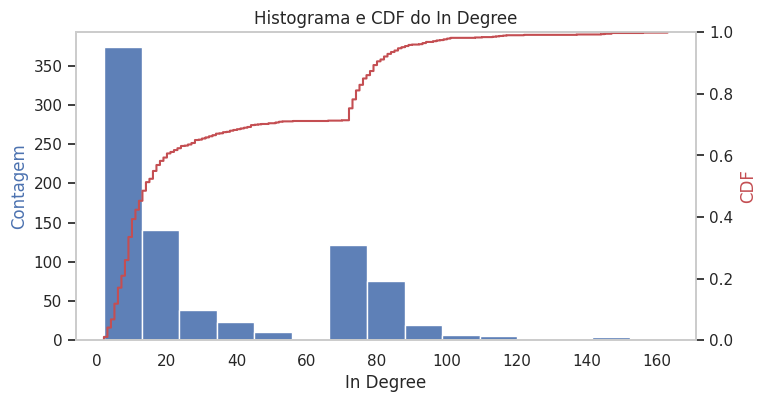

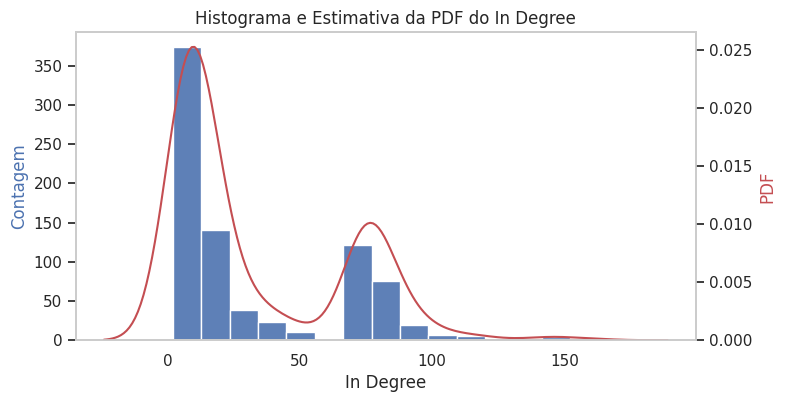

In [ ]:
# Calcular os graus de entrada dos vértices
in_degrees = dict(common_subgraph.in_degree())

# Criar a figura e os eixos para a CDF
fig1, ax1 = plt.subplots(figsize=(8, 4))

# Plotar o histograma
sns.histplot(list(in_degrees.values()), bins=15, color='b', alpha=0.9, ax=ax1, label='Histograma - In Degree')

# Criar um segundo eixo para a CDF
ax2 = ax1.twinx()
sns.ecdfplot(list(in_degrees.values()), color='r', ax=ax2, label='CDF')

# Adicionar rótulos e legendas
ax1.set_xlabel('In Degree')
ax1.set_ylabel('Contagem', color='b')
ax2.set_ylabel('CDF', color='r')

ax1.grid(False)
ax2.grid(False)

plt.title('Histograma e CDF do In Degree')

# Criar a figura e os eixos para a PDF
fig2, ax3 = plt.subplots(figsize=(8, 4))

# Plotar o histograma e a estimativa da PDF
sns.histplot(list(in_degrees.values()), bins=15, color='b', alpha=0.9, ax=ax3, label='Histograma - In Degree')
ax4 = ax3.twinx()
sns.kdeplot(list(in_degrees.values()), color='r', ax=ax4, label='Estimativa PDF')

# Adicionar rótulos e legendas
ax3.set_xlabel('In Degree')
ax3.set_ylabel('Contagem', color='b')
ax4.set_ylabel('PDF', color='r')

ax3.grid(False)
ax4.grid(False)

plt.title('Histograma e Estimativa da PDF do In Degree')

# Exibir as figuras
plt.show()
